In [1]:
# Change directory to the upper directory.
import os

analysis_dir_name = "analysis"

current_dir = os.path.split(os.getcwd())[1]
if current_dir == analysis_dir_name:
    os.chdir("..")

In [2]:
from ai.ai_with_flags import AIWithFlags
from ai.evaluation import scores
from ai.helpers import model_file_path

%matplotlib notebook
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import random

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [7]:
seed = 42
playful_level_list = list(np.round(np.arange(0.5, 1.55, 0.05), 2))
flag_threshold_list = list(np.round(np.arange(0.5, 1.05, 0.05), 2))
#flag_threshold_list = list(np.round(np.arange(0.9, 1.01, 0.01), 2))

num_rows_grid = 10
num_columns_grid = 10
num_bombs_grid = 10
subgrid_radius = 2

num_games = 1000
max_score = (num_rows_grid * num_columns_grid) - num_bombs_grid

model_file_name = model_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, subgrid_radius, with_flags=True)
model = load_model(model_file_name)

ai = AIWithFlags(model, subgrid_radius=subgrid_radius)
pl_ft_wr_list = [] # 'pl' means 'playful_level', 'ft' means 'flag_threshold' and 'wr' means 'win_rate'
for i, playful_level in enumerate(playful_level_list):
    print("Playful level: {}".format(playful_level))
    ai.playful_level = playful_level

    for j, flag_threshold in enumerate(flag_threshold_list):
        print("\tFlag threshold: {}".format(flag_threshold))
        ai.flag_threshold = flag_threshold
        random.seed(seed)
        
        score_list = scores(ai, num_games, num_rows_grid, num_columns_grid, num_bombs_grid)
        win_rate = score_list.count(max_score) / num_games
        pl_ft_wr_list.append((playful_level, flag_threshold, win_rate))
        
        print("\t\tWin rate: {}".format(win_rate))
    
    print('')

Playful level: 0.5
	Flag threshold: 0.9
		Win rate: 0.569
	Flag threshold: 0.91
		Win rate: 0.592
	Flag threshold: 0.92
		Win rate: 0.619
	Flag threshold: 0.93
		Win rate: 0.653
	Flag threshold: 0.94
		Win rate: 0.687
	Flag threshold: 0.95
		Win rate: 0.727
	Flag threshold: 0.96
		Win rate: 0.752
	Flag threshold: 0.97
		Win rate: 0.788
	Flag threshold: 0.98
		Win rate: 0.821
	Flag threshold: 0.99
		Win rate: 0.845
	Flag threshold: 1.0
		Win rate: 0.34

Playful level: 0.55
	Flag threshold: 0.9
		Win rate: 0.569
	Flag threshold: 0.91
		Win rate: 0.592
	Flag threshold: 0.92
		Win rate: 0.619
	Flag threshold: 0.93
		Win rate: 0.653
	Flag threshold: 0.94
		Win rate: 0.687
	Flag threshold: 0.95
		Win rate: 0.727
	Flag threshold: 0.96
		Win rate: 0.752
	Flag threshold: 0.97
		Win rate: 0.788
	Flag threshold: 0.98
		Win rate: 0.821
	Flag threshold: 0.99
		Win rate: 0.845
	Flag threshold: 1.0
		Win rate: 0.34

Playful level: 0.6
	Flag threshold: 0.9
		Win rate: 0.569
	Flag threshold: 0.91
		Win

		Win rate: 0.34

Playful level: 1.4
	Flag threshold: 0.9
		Win rate: 0.765
	Flag threshold: 0.91
		Win rate: 0.765
	Flag threshold: 0.92
		Win rate: 0.765
	Flag threshold: 0.93
		Win rate: 0.765
	Flag threshold: 0.94
		Win rate: 0.765
	Flag threshold: 0.95
		Win rate: 0.765
	Flag threshold: 0.96
		Win rate: 0.765
	Flag threshold: 0.97
		Win rate: 0.763
	Flag threshold: 0.98
		Win rate: 0.759
	Flag threshold: 0.99
		Win rate: 0.747
	Flag threshold: 1.0
		Win rate: 0.34

Playful level: 1.45
	Flag threshold: 0.9
		Win rate: 0.694
	Flag threshold: 0.91
		Win rate: 0.694
	Flag threshold: 0.92
		Win rate: 0.694
	Flag threshold: 0.93
		Win rate: 0.694
	Flag threshold: 0.94
		Win rate: 0.694
	Flag threshold: 0.95
		Win rate: 0.694
	Flag threshold: 0.96
		Win rate: 0.694
	Flag threshold: 0.97
		Win rate: 0.692
	Flag threshold: 0.98
		Win rate: 0.689
	Flag threshold: 0.99
		Win rate: 0.682
	Flag threshold: 1.0
		Win rate: 0.34

Playful level: 1.5
	Flag threshold: 0.9
		Win rate: 0.652
	Flag thr

In [8]:
opacity = 1
color = '#FED487'
edge_color = 'black'
mean_color = 'orange'
median_color = 'red'
dot_color = 'black'

save_fig = True
plot_path = analysis_dir_name + "/plots/"
fig_format = 'png'
fig_dpi = 500

In [9]:
def win_rate_to_rgb(win_rate):
    """
    Compute a colour from a win rate. A green colour means that the win rate is high while a red colour means that
    the win rate is low.
    
    :win_rate: The win rate.
    :return: The colour in RGB format.
    """
    
    return [(1 - win_rate), win_rate, 0]

pl_ft_wr_list_transposed = np.transpose(pl_ft_wr_list)
playful_levels = pl_ft_wr_list_transposed[0]
flag_thresholds = pl_ft_wr_list_transposed[1]
win_rates = pl_ft_wr_list_transposed[2]
win_rates_rgb = [win_rate_to_rgb(wr) for wr in win_rates]

<IPython.core.display.Javascript object>


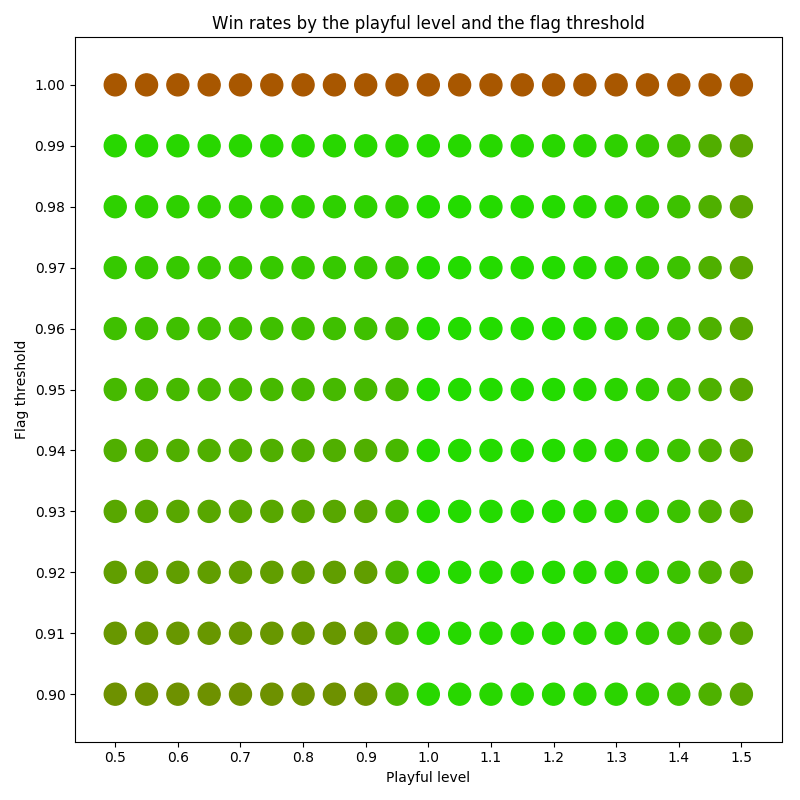

In [11]:
# Scatter plot of win rates by two parameters of the artificial intelligence with flags.

fig = plt.figure(figsize=(8, 8))
plt.scatter(playful_levels, flag_thresholds, s=250, facecolors=win_rates_rgb)
plt.xticks(playful_level_list[::2])
plt.yticks(flag_threshold_list)
plt.title('Win rates by the playful level and the flag threshold')
plt.xlabel('Playful level')
plt.ylabel('Flag threshold')
#plt.ylim(ymin=0.8922, ymax=1.0078)
plt.tight_layout()
plt.show()
if save_fig:
    plt.savefig((plot_path + 'win_rates_by_ai_parameters.' + fig_format), format=fig_format, dpi=fig_dpi)